# Cases: Retrospective evaluation, comparison with EU Hub

In [4]:
%load_ext autoreload
%autoreload 2
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob 
import warnings
import time
warnings.filterwarnings("ignore")
import sys
sys.path.append('../source/')
sys.path.append('../methods_configuration/')
from precomputing import read_countrydata, read_countries, repair_increasing 
from smoothing import piecewise_STL,simple_mirroring, two_step_STL
import numpy as np
import time
from benchmark import benchmark 
from visualization import plot_last_forecast     
import pandas as pd
from scipy import stats 
import matplotlib.colors as colors
import seaborn as sns
import matplotlib.ticker as ticker 
from paper_evaluation import evaluation  
from scipy.stats.mstats import winsorize
from paper_evaluation_hub import evaluation_hub

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from countries_preselected import countries_JHU  
countries = list(set(countries_JHU)-set(["Cases_on_an_international_conveyance_Japan", 
                                            "Diamond_Princess", "Diamond Princess", "MS Zaandam"]))  

In [8]:
def print_rank(crit):
    """
    function which outputs the ranking for the method: 
    method A is best for 5 countries, method A is second best for 10 countries, etc.
    """
    col_l = ['EuroCOVIDhub-ensemble',
             'IEM_Health-CovidProject',
             'ILM-EKF',
             'MUNI-ARIMA',
             'RobertWalraven',
             'USC-SIkJalpha',
             'SDSC_ISG']
    countries = np.array(RI["country"])
    rank_ = np.argsort(crit.argsort(axis=1), axis=1)
    for i, col in enumerate(col_l): 
        rank__ = rank_[:,i] 
        for i in range(1,6):
            print(col + " better or equal to the place "+str(i)+" ", np.sum(rank__<i)) 
            print([countries[j] for j in range(len(countries)) if rank__[j]==i-1])
            
            
def plot_hist(mat, cols, name):
    #histogramms of errors in "mat", the error is given by "col"
    col_l = ['EuroCOVIDhub-ensemble',
             'IEM_Health-CovidProject',
             'ILM-EKF',
             'MUNI-ARIMA',
             'RobertWalraven',
             'USC-SIkJalpha',
             'SDSC_ISG']
    
    c = ["red","blue","green","orange","magenta","grey","yellow"]
    fig,ax = plt.subplots(7,1,figsize=(7,5),sharex=True,dpi=600)
    bins = np.arange(0.2,1.7,0.1)
    for i in range(0,len(cols)):
        
        vals = np.where(mat[cols[i]]<1.5, mat[cols[i]],1.55)
         
        h = sns.histplot(vals,bins=bins,alpha=0.7, ax=ax[i],color=c[i])
        print(h)
        ax[i].legend([col_l[i]])
        ax[i].grid(which='major')
        ax[i].set(ylabel='') 
        ax[i].set_xlim([0,1.6])
        ax[i].xaxis.set_ticks(np.arange(0.2, 1.6, 0.1))
        ax[i].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
        temp = ax[i].xaxis.get_ticklabels()
        temp = list(set(temp) - set(temp[::2]))
        for label in temp:
            label.set_visible(False)
    
    plt.tight_layout(pad=0)
    plt.savefig(name+'.pdf')      

In [9]:
models = [ 
    "EuroCOVIDhub-ensemble", 
    "EuroCOVIDhub-baseline", "MUNI-ARIMA", "IEM_Health-CovidProject", "USC-SIkJalpha", "RobertWalraven-ESG", "ILM-EKF"#"Karlen-pypm"# "epiforecasts-EpiNow2"
]

#  Compare the method from our dashboard with submissions to EU Covid-19 Forecast Hub

# 2 weeks ahead forecasts

In [11]:
errors, RI, WIS,coverage = evaluation_hub(countries, date_limits=['2021-04-01','2021-12-15'], 
                                          models=models, addon="",typedata="cases",H=14, baseline = "EuroCOVIDhub-baseline") 

## MAE: Table and histogram 2 weeks ahead forecast w.r.t. EuroCOVIDhub-baseline

\begin{tabular}{lrrrrrrr}
\toprule
       country &  EuroCOVIDhub-ensemble\_RIMAE &  IEM\_Health-CovidProject\_RIMAE &  ILM-EKF\_RIMAE &  MUNI-ARIMA\_RIMAE &  RobertWalraven-ESG\_RIMAE &  USC-SIkJalpha\_RIMAE &  forecast\_RIMAE \\
\midrule
       Austria &                         0.81 &                           1.49 &           1.43 &              0.60 &                      1.00 &                 0.56 &            0.93 \\
       Belgium &                         0.74 &                           1.45 &           1.31 &              1.21 &                      1.21 &                 0.91 &            1.23 \\
      Bulgaria &                         0.95 &                           1.59 &           1.68 &              0.62 &                      1.05 &                 0.87 &            1.04 \\
       Croatia &                         0.88 &                           1.66 &           1.56 &              0.74 &                      0.98 &                 0.94 &            0.92 \\
        

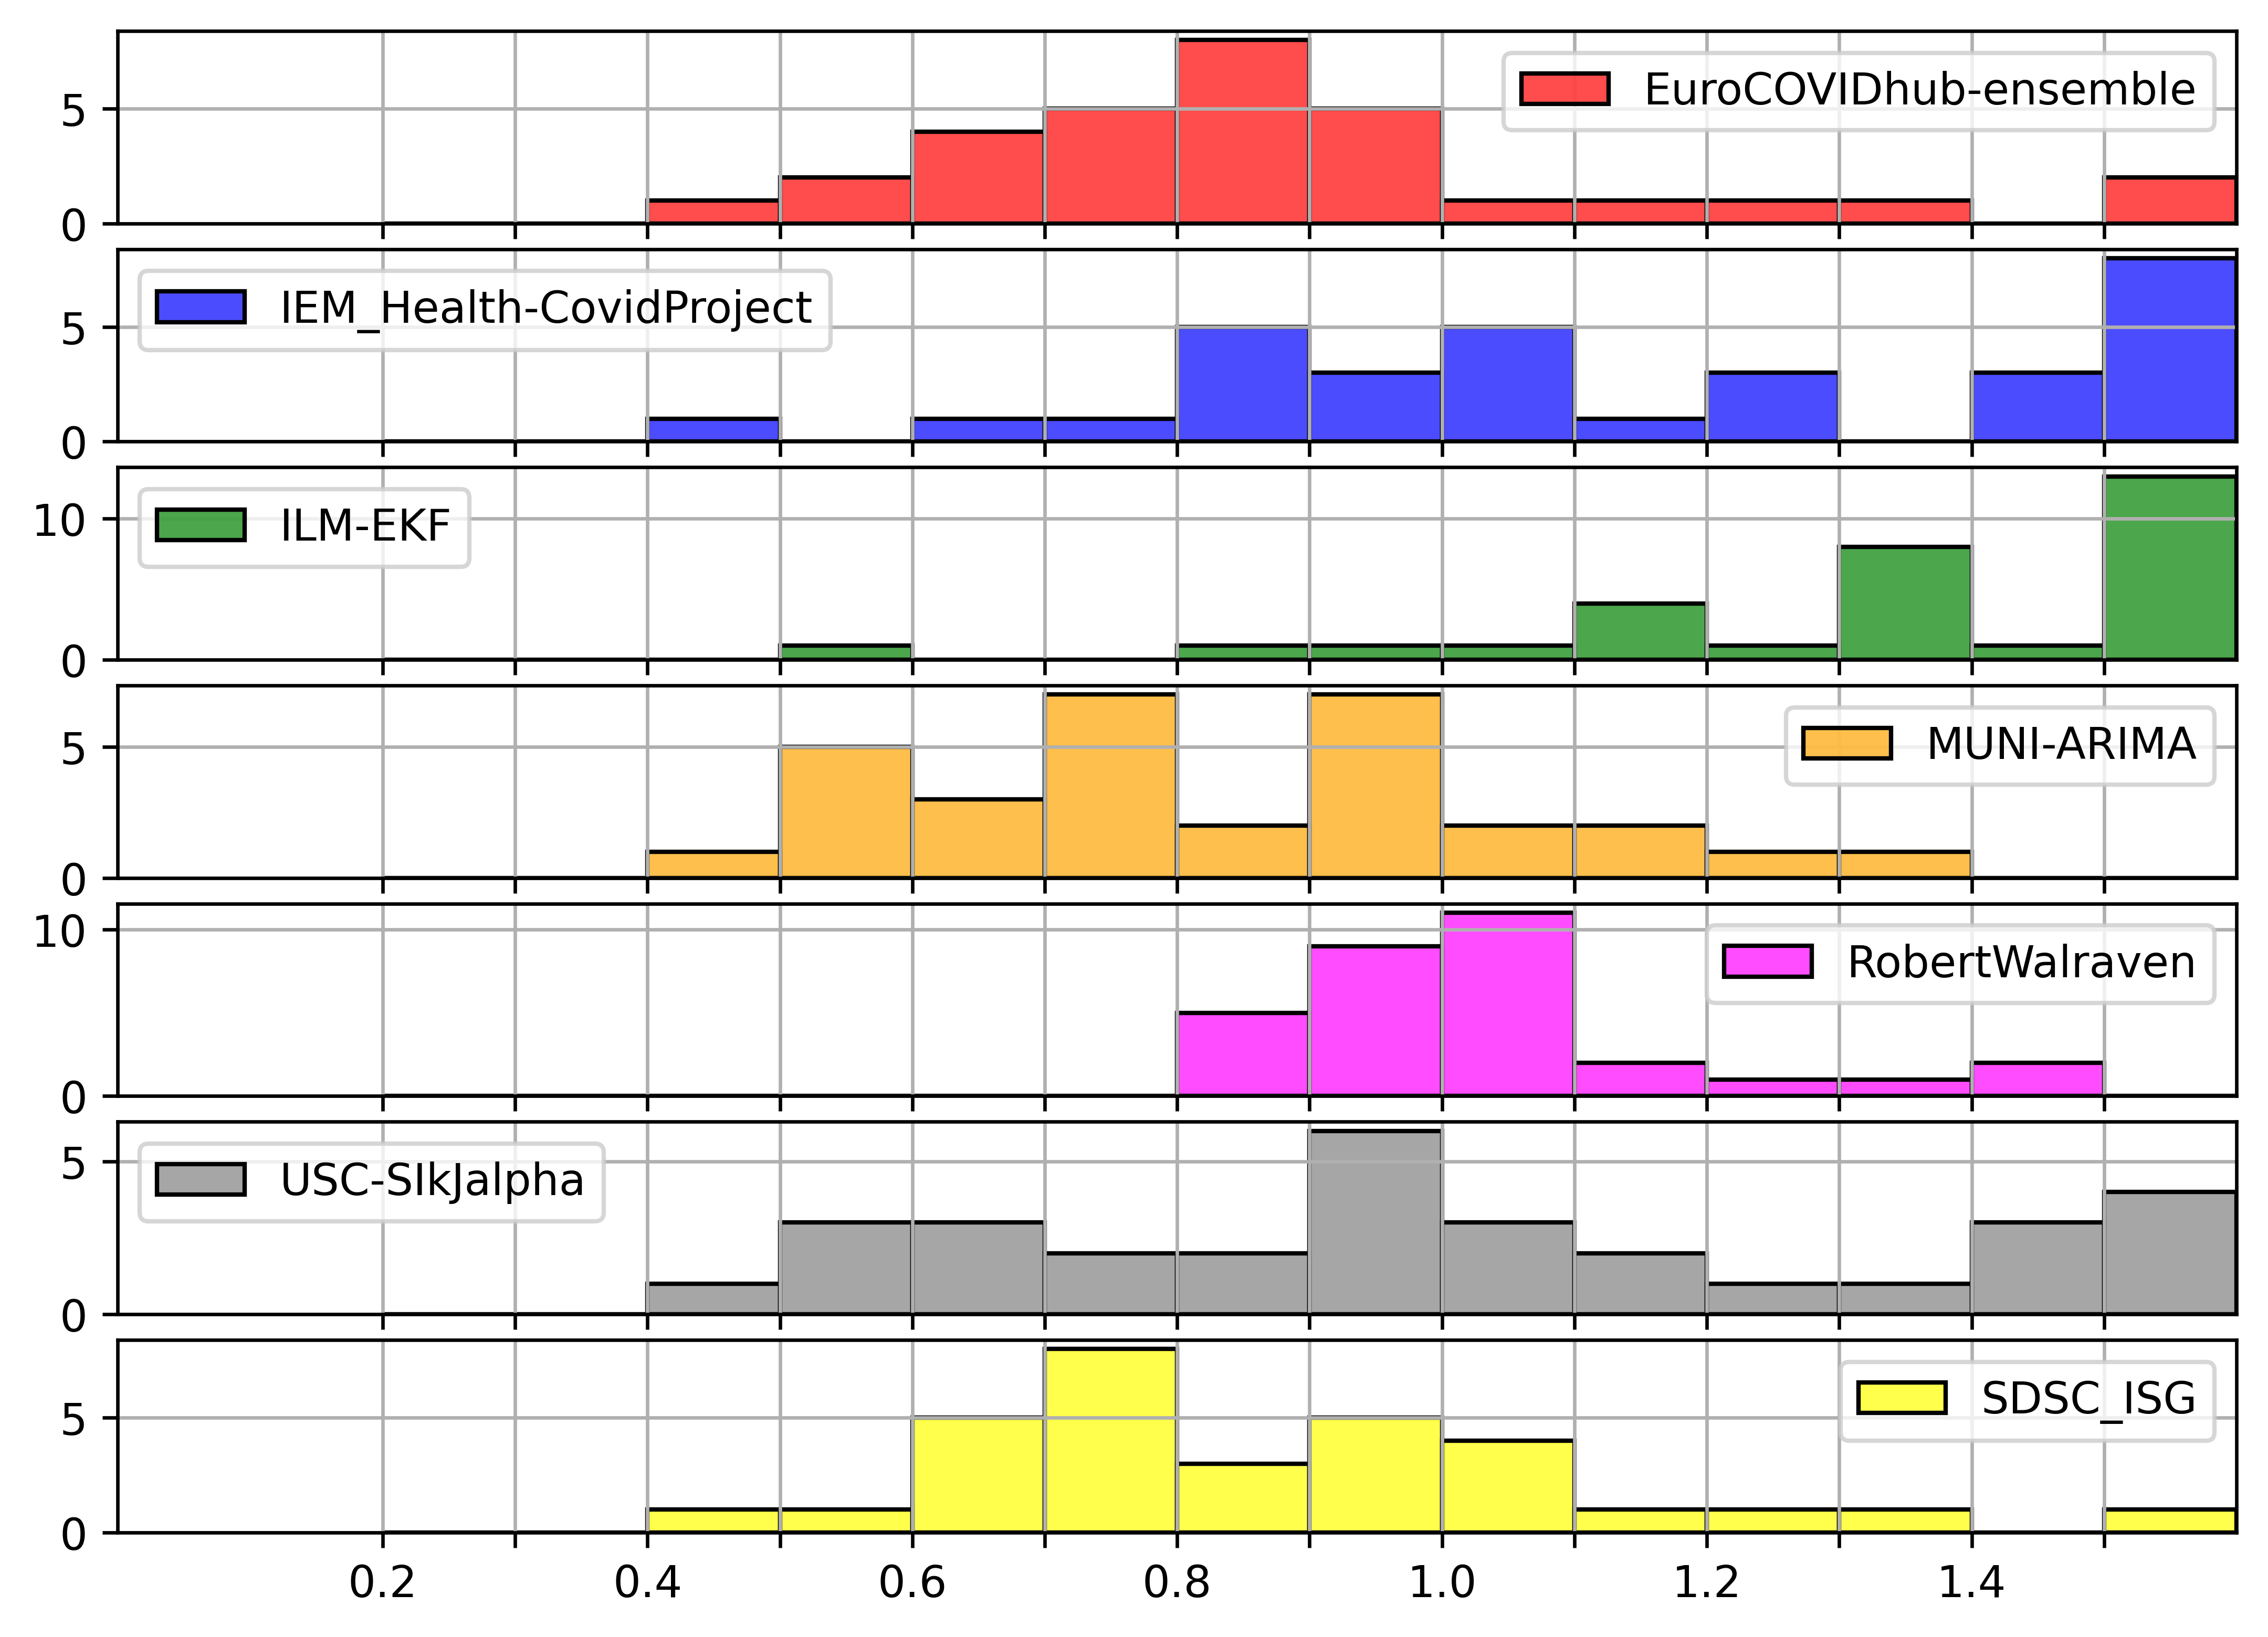

In [12]:
print(RI[["country"]+sorted([col for col in RI.columns if "RIMAE" in col])].round(2).to_latex(index=False))
cols = sorted([col for col in RI.columns if "RIMAE" in col])
crit = RI[cols].values 
print_rank(crit)
plot_hist(RI,cols,"mae_2w")

## WIS: Table and histogram 2 weeks ahead forecast w.r.t. EuroCOVIDhub-baseline

EuroCOVIDhub-ensemble better or equal to the place 1  8
['Belgium', 'Denmark', 'Estonia', 'Finland', 'France', 'Luxembourg', 'Portugal', 'Switzerland']
EuroCOVIDhub-ensemble better or equal to the place 2  19
['Bulgaria', 'Croatia', 'Germany', 'Greece', 'Ireland', 'Italy', 'Lithuania', 'Malta', 'Slovakia', 'Spain', 'Sweden']
EuroCOVIDhub-ensemble better or equal to the place 3  28
['Austria', 'Cyprus', 'Czechia', 'Iceland', 'Latvia', 'Liechtenstein', 'Norway', 'Poland', 'Slovenia']
EuroCOVIDhub-ensemble better or equal to the place 4  30
['Hungary', 'Romania']
EuroCOVIDhub-ensemble better or equal to the place 5  30
[]
IEM_Health-CovidProject better or equal to the place 1  0
[]
IEM_Health-CovidProject better or equal to the place 2  2
['Estonia', 'Finland']
IEM_Health-CovidProject better or equal to the place 3  5
['Denmark', 'Netherlands', 'Portugal']
IEM_Health-CovidProject better or equal to the place 4  14
['Cyprus', 'Czechia', 'France', 'Italy', 'Lithuania', 'Luxembourg', 'Norway

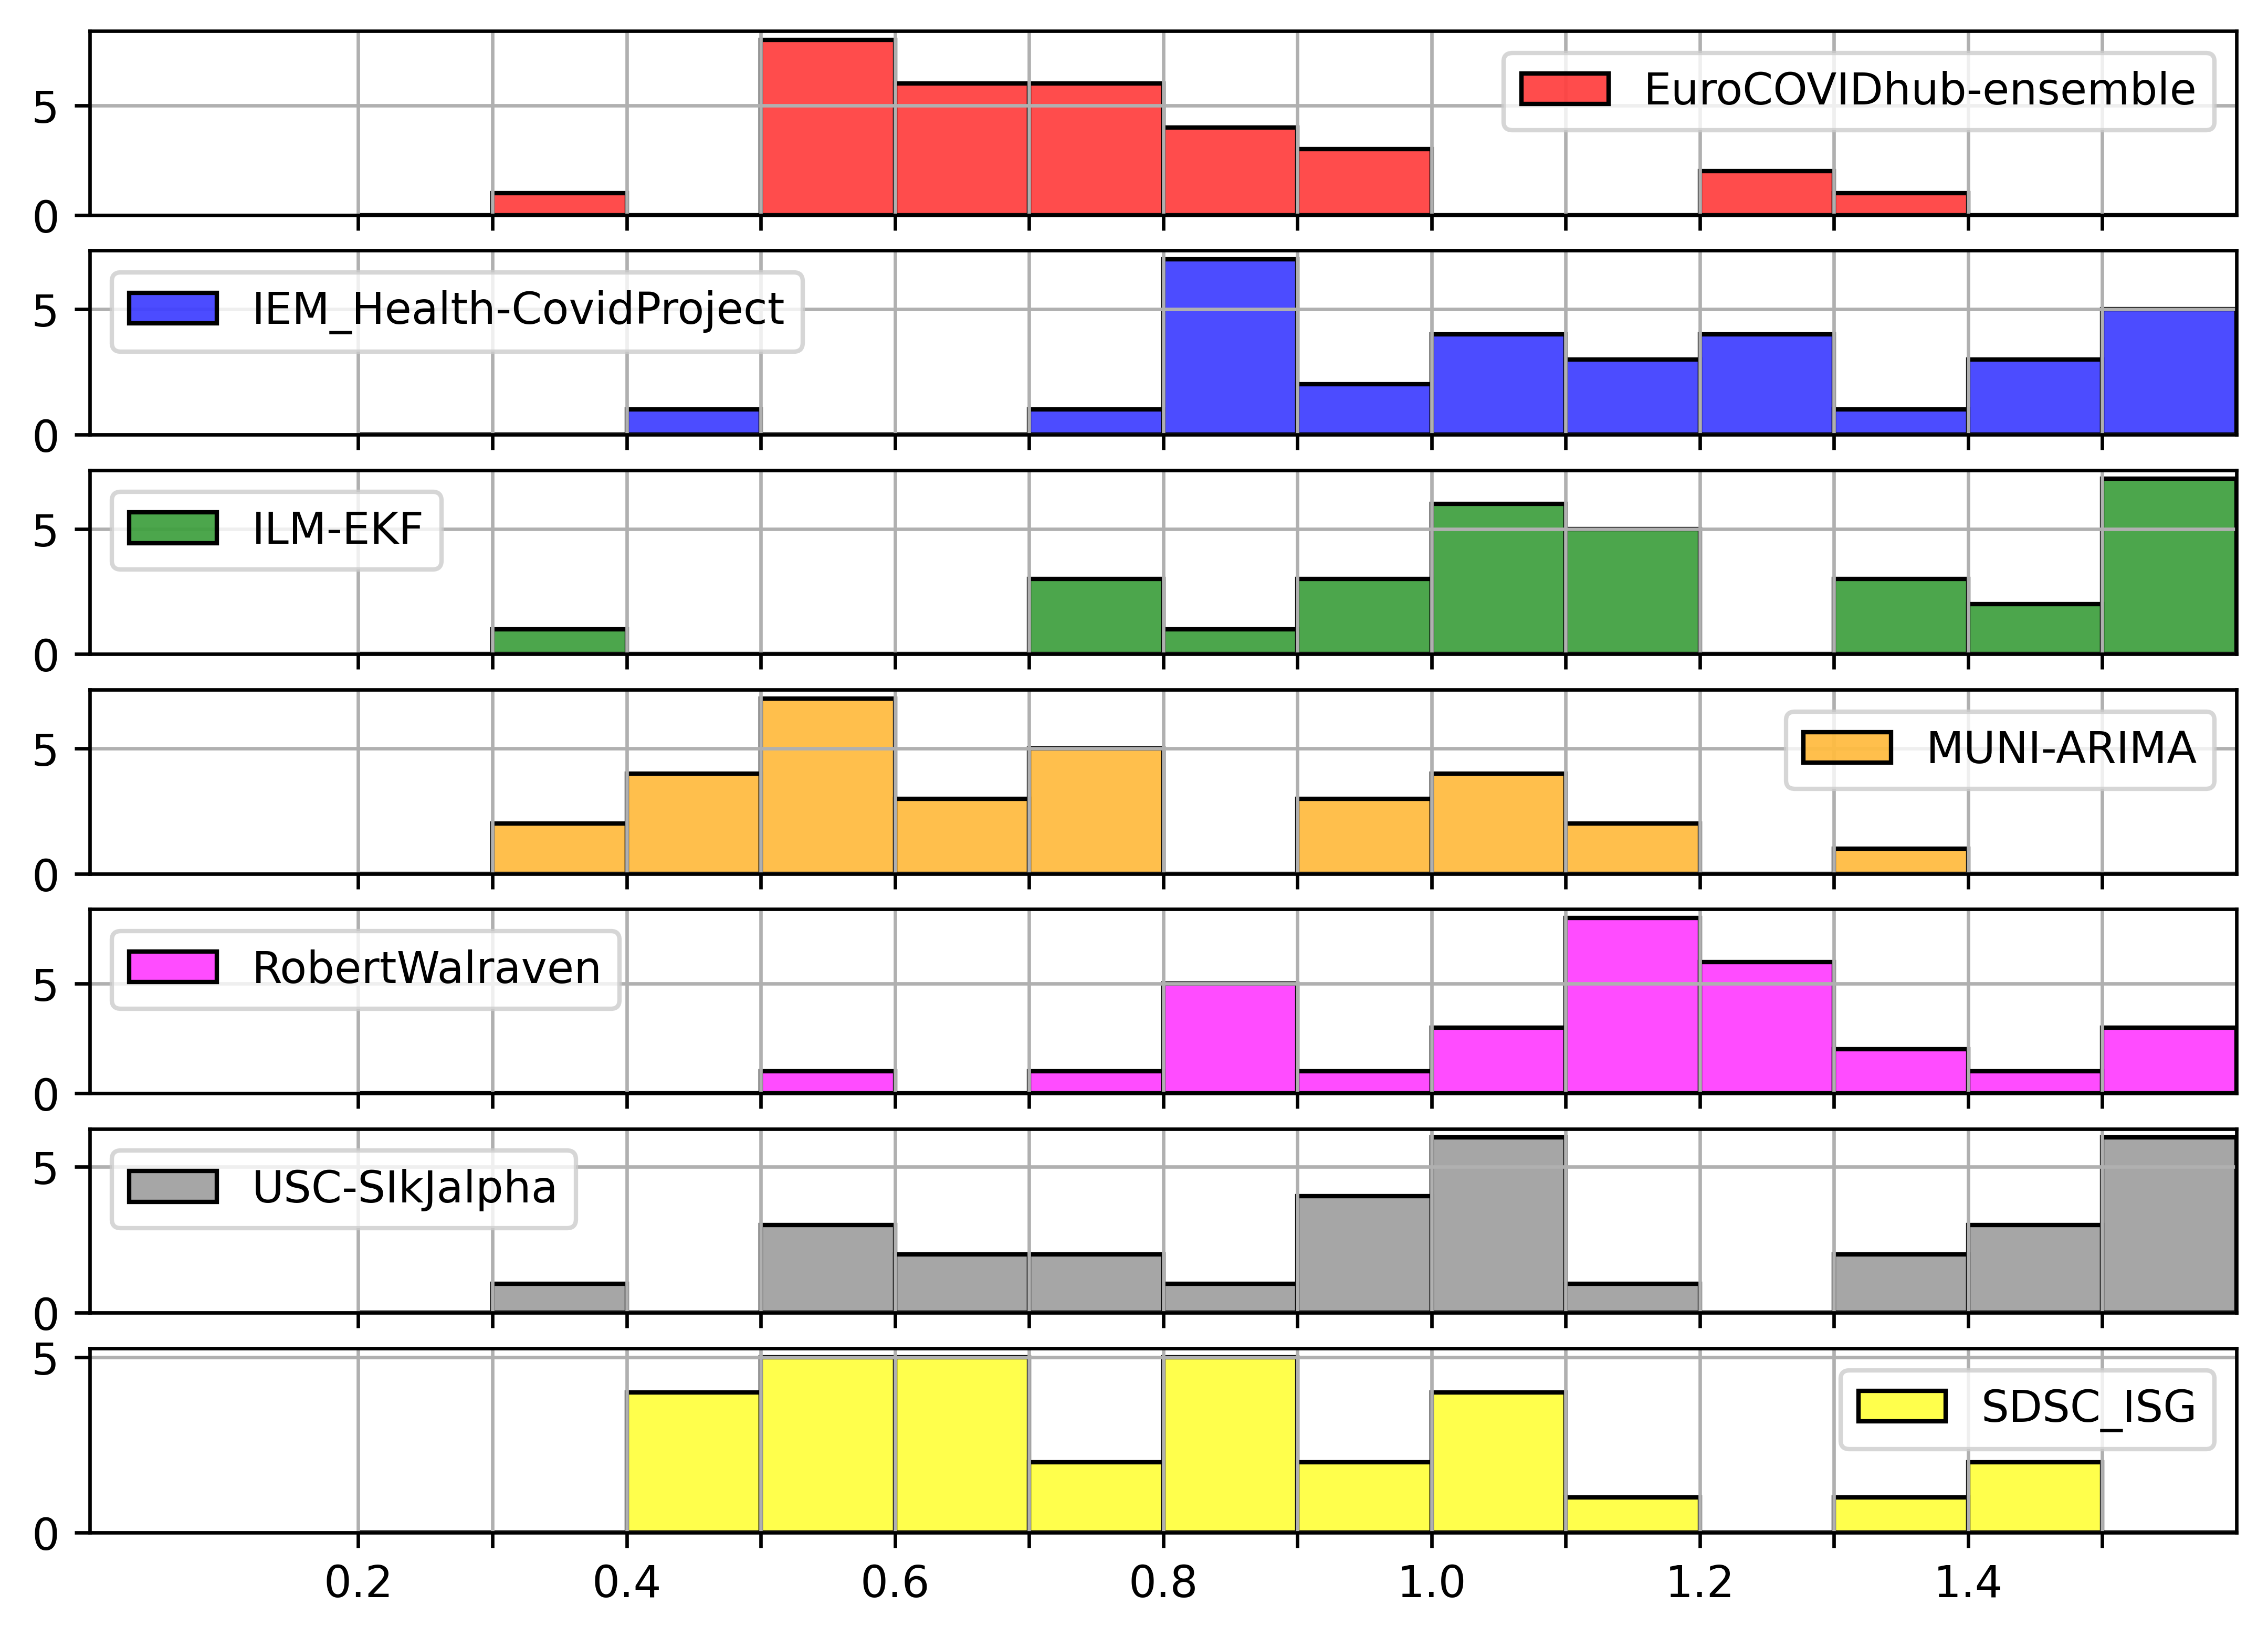

In [13]:
cols = [col for col in WIS.columns if "abs" not in col]
cols = [cols[0]]+sorted(cols[1:])

crit = WIS[cols[1:]].values 
print_rank(crit)

plot_hist(WIS,cols[1:],"wis_2w")

print(WIS[cols].round(2).to_latex(index=False))

# 1 week ahead results

In [14]:
errors, RI, WIS,coverage = evaluation_hub(countries, date_limits=['2021-04-01','2021-12-30'], 
                                          models=models, addon="",typedata="cases",H=7,baseline = "EuroCOVIDhub-baseline") 

## MAE: ranking 1 week ahead forecasts w.r.t. EuroCOVIDhub-baseline

In [15]:
crit = RI[sorted([col for col in RI.columns if "RIMAE" in col])].values 
print_rank(crit)

EuroCOVIDhub-ensemble better or equal to the place 1  4
['Germany', 'Liechtenstein', 'Luxembourg', 'Switzerland']
EuroCOVIDhub-ensemble better or equal to the place 2  15
['Belgium', 'Bulgaria', 'Croatia', 'Denmark', 'France', 'Ireland', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Spain']
EuroCOVIDhub-ensemble better or equal to the place 3  28
['Austria', 'Cyprus', 'Czechia', 'Estonia', 'Finland', 'Greece', 'Iceland', 'Italy', 'Latvia', 'Lithuania', 'Norway', 'Slovakia', 'Slovenia']
EuroCOVIDhub-ensemble better or equal to the place 4  31
['Hungary', 'Romania', 'Sweden']
EuroCOVIDhub-ensemble better or equal to the place 5  31
[]
IEM_Health-CovidProject better or equal to the place 1  2
['Cyprus', 'Iceland']
IEM_Health-CovidProject better or equal to the place 2  5
['Estonia', 'Finland', 'Switzerland']
IEM_Health-CovidProject better or equal to the place 3  8
['Denmark', 'Netherlands', 'Portugal']
IEM_Health-CovidProject better or equal to the place 4  14
['France', 'Latvia', 'Lith

## MAE: Table  1 week ahead forecast w.r.t. EuroCOVIDhub-baseline

In [16]:
print(RI[["country"]+sorted([col for col in RI.columns if "RIMAE" in col])].round(2).to_latex(index=False))

\begin{tabular}{lrrrrrrr}
\toprule
       country &  EuroCOVIDhub-ensemble\_RIMAE &  IEM\_Health-CovidProject\_RIMAE &  ILM-EKF\_RIMAE &  MUNI-ARIMA\_RIMAE &  RobertWalraven-ESG\_RIMAE &  USC-SIkJalpha\_RIMAE &  forecast\_RIMAE \\
\midrule
       Austria &                         0.71 &                           1.05 &           0.79 &              0.82 &                      1.05 &                 0.64 &            0.70 \\
       Belgium &                         0.81 &                           1.11 &           0.85 &              1.09 &                      1.33 &                 0.77 &            1.49 \\
      Bulgaria &                         0.77 &                           1.34 &           1.14 &              0.53 &                      1.13 &                 0.80 &            0.79 \\
       Croatia &                         0.70 &                           1.16 &           0.94 &              0.72 &                      0.94 &                 0.83 &            0.61 \\
        

## WIS: Table 1 week ahead forecast w.r.t. EuroCOVIDhub-baseline

In [17]:
cols = [col for col in WIS.columns if "abs" not in col]
cols = [cols[0]]+sorted(cols[1:])
print(WIS[cols].round(2).to_latex(index=False))

\begin{tabular}{lrrrrrrr}
\toprule
       country &  EuroCOVIDhub-ensembleWIS &  IEM\_Health-CovidProjectWIS &  ILM-EKFWIS &  MUNI-ARIMAWIS &  RobertWalraven-ESGWIS &  USC-SIkJalphaWIS &  forecastsqrtWIS \\
\midrule
       Austria &                      0.55 &                        0.99 &        0.54 &           0.78 &                   1.06 &              0.61 &             0.54 \\
       Belgium &                      0.61 &                        0.92 &        0.64 &           0.97 &                   1.30 &              0.79 &             1.21 \\
      Bulgaria &                      0.57 &                        1.11 &        0.88 &           0.45 &                   1.06 &              0.80 &             0.66 \\
       Croatia &                      0.58 &                        0.83 &        0.73 &           0.56 &                   0.81 &              0.85 &             0.58 \\
        Cyprus &                      0.66 &                        0.77 &        2.19 &           0

## WIS:histogram 1 week ahead forecast w.r.t. EuroCOVIDhub-baseline

AxesSubplot(0.125,0.787927;0.775x0.0920732)
AxesSubplot(0.125,0.677439;0.775x0.0920732)
AxesSubplot(0.125,0.566951;0.775x0.0920732)
AxesSubplot(0.125,0.456463;0.775x0.0920732)
AxesSubplot(0.125,0.345976;0.775x0.0920732)
AxesSubplot(0.125,0.235488;0.775x0.0920732)
AxesSubplot(0.125,0.125;0.775x0.0920732)


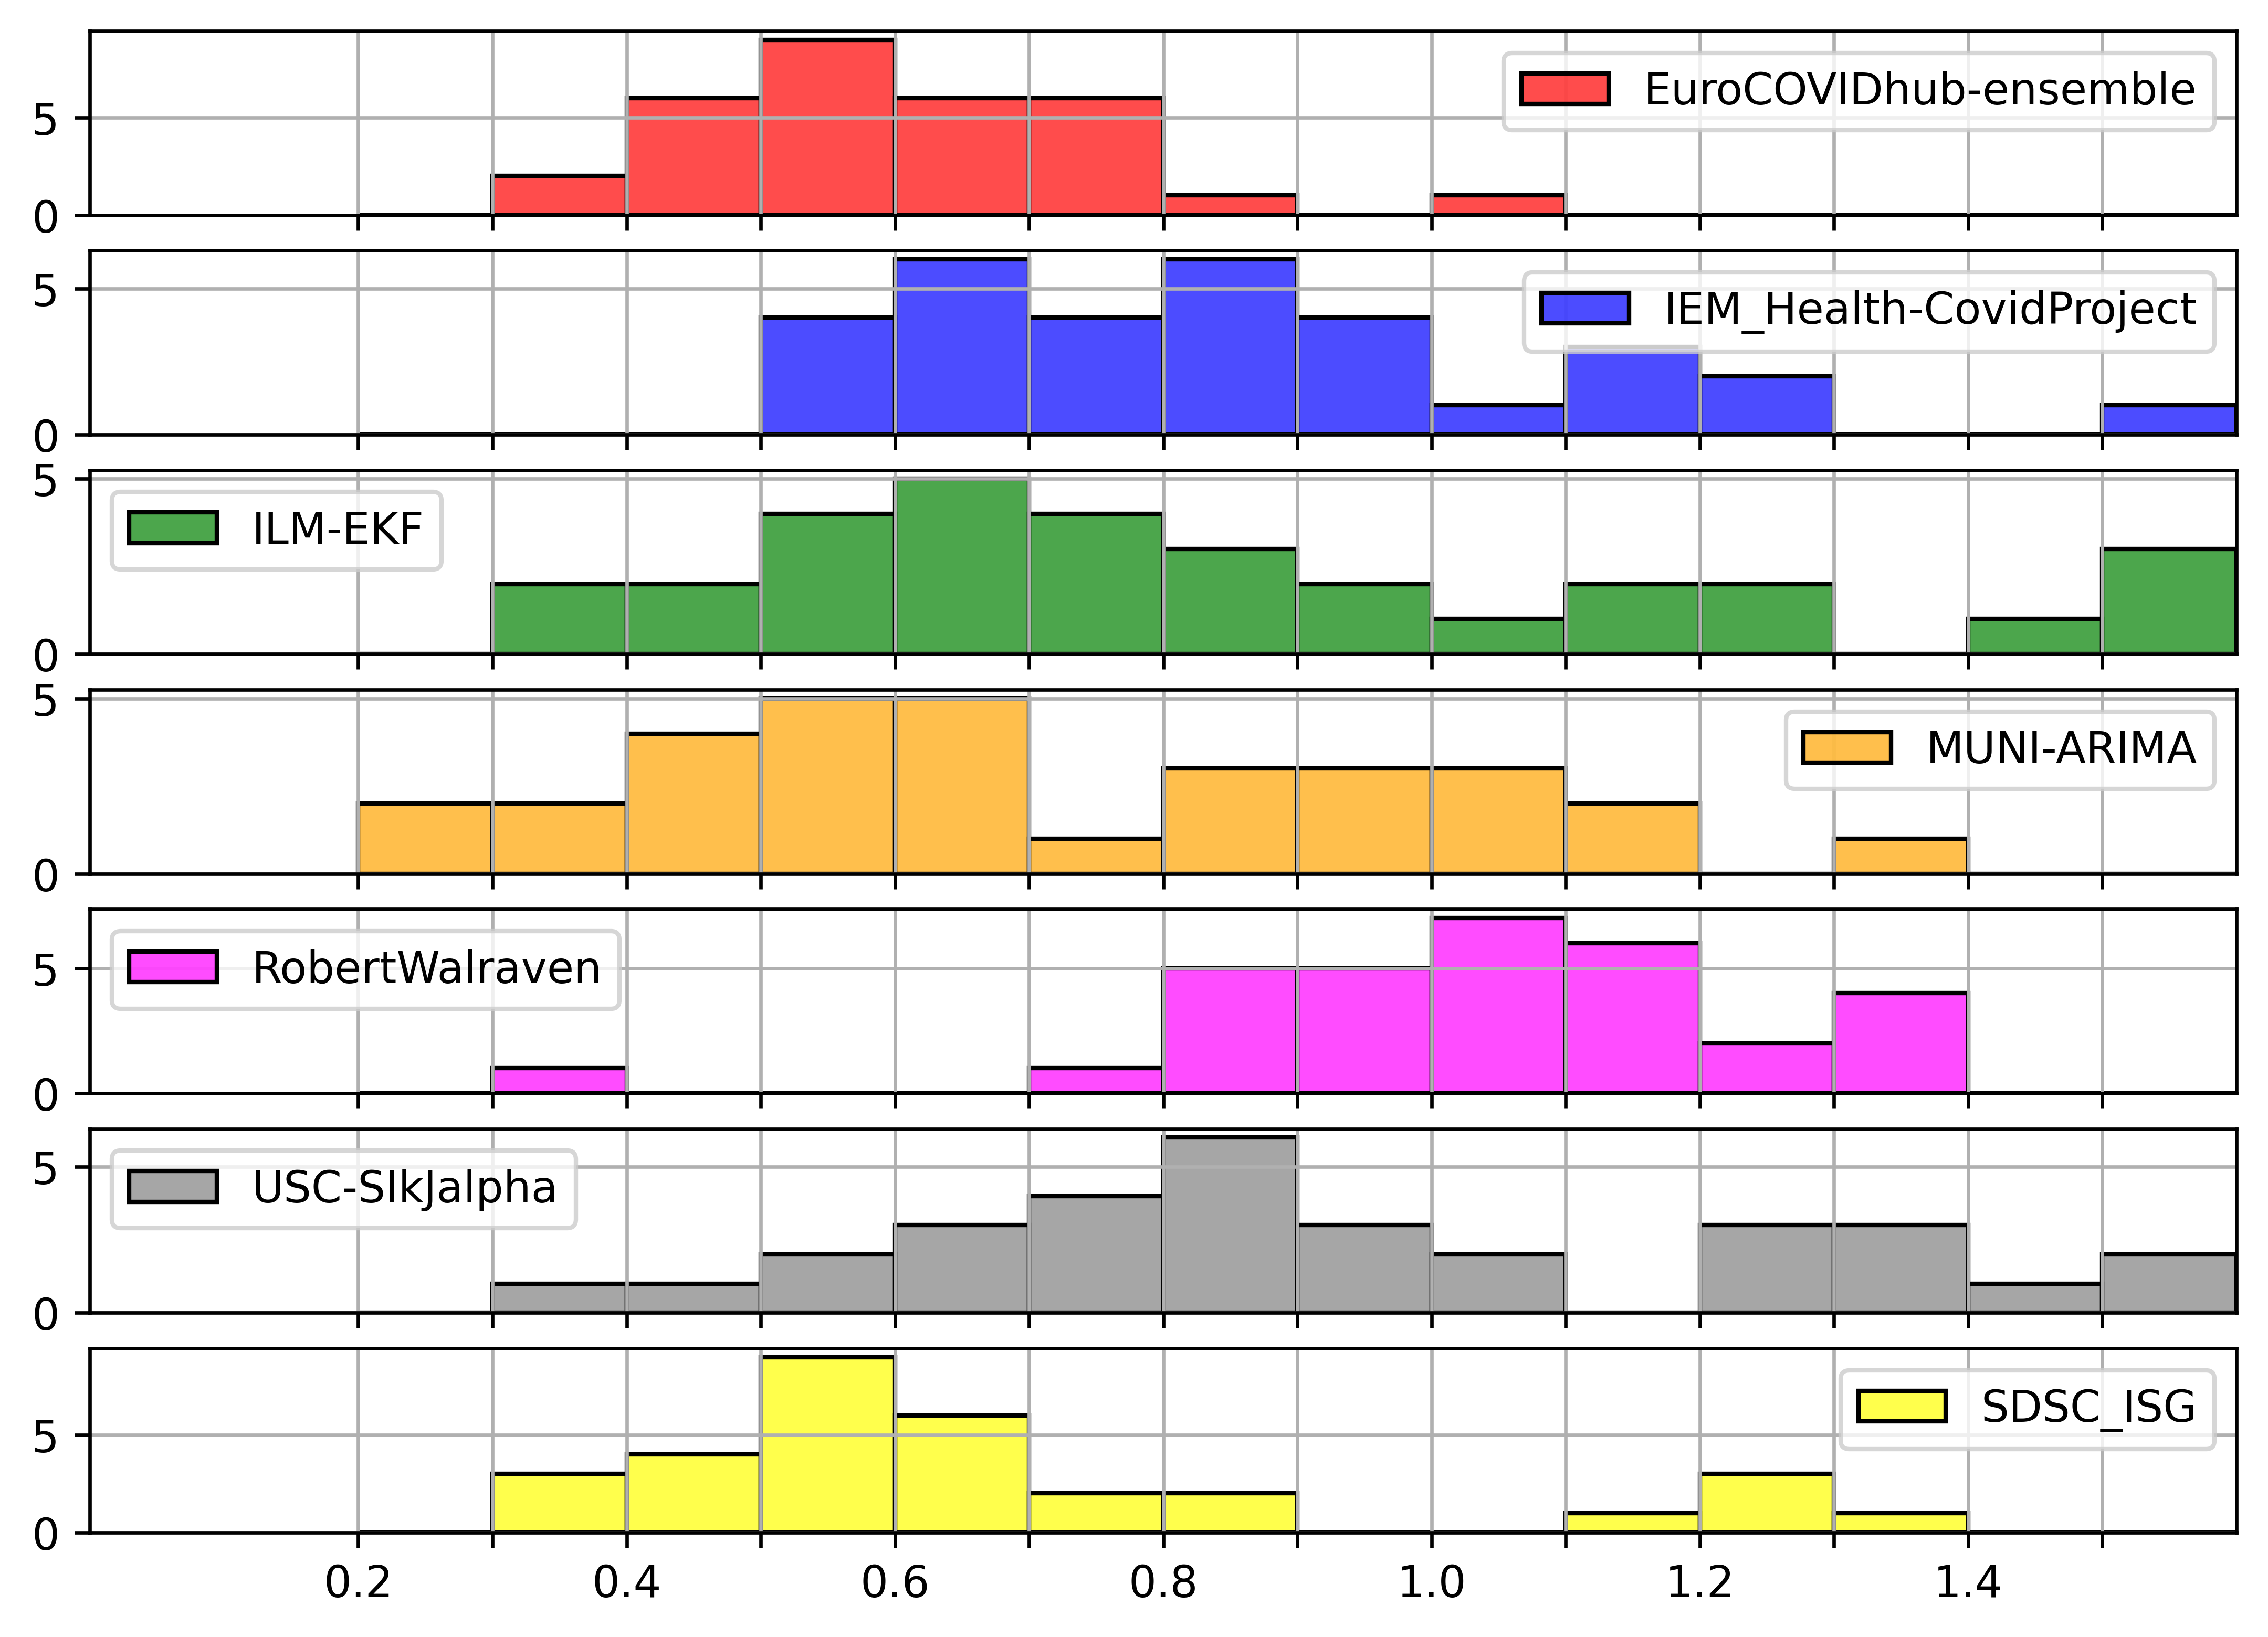

In [18]:
plot_hist(WIS,cols[1:],"wis_1w")

## WIS: ranking for Table 1 for 1 week ahead forecast w.r.t. EuroCOVIDhub-baseline

In [19]:
crit = WIS[cols[1:]].values
print_rank(crit)

EuroCOVIDhub-ensemble better or equal to the place 1  7
['Belgium', 'France', 'Ireland', 'Luxembourg', 'Netherlands', 'Portugal', 'Switzerland']
EuroCOVIDhub-ensemble better or equal to the place 2  21
['Bulgaria', 'Croatia', 'Cyprus', 'Denmark', 'Germany', 'Greece', 'Hungary', 'Liechtenstein', 'Lithuania', 'Malta', 'Poland', 'Slovakia', 'Spain', 'Sweden']
EuroCOVIDhub-ensemble better or equal to the place 3  31
['Austria', 'Czechia', 'Estonia', 'Finland', 'Iceland', 'Italy', 'Latvia', 'Norway', 'Romania', 'Slovenia']
EuroCOVIDhub-ensemble better or equal to the place 4  31
[]
EuroCOVIDhub-ensemble better or equal to the place 5  31
[]
IEM_Health-CovidProject better or equal to the place 1  2
['Estonia', 'Finland']
IEM_Health-CovidProject better or equal to the place 2  2
[]
IEM_Health-CovidProject better or equal to the place 3  9
['Cyprus', 'Denmark', 'France', 'Ireland', 'Portugal', 'Slovakia', 'Spain']
IEM_Health-CovidProject better or equal to the place 4  14
['Belgium', 'Liechten

## MAE: Table for 1 week ahead forecast w.r.t. EuroCOVIDhub-baseline

In [20]:
crit = RI[ sorted([col for col in RI.columns if "RIMAE" in col])].values 
print_rank(crit)

EuroCOVIDhub-ensemble better or equal to the place 1  4
['Germany', 'Liechtenstein', 'Luxembourg', 'Switzerland']
EuroCOVIDhub-ensemble better or equal to the place 2  15
['Belgium', 'Bulgaria', 'Croatia', 'Denmark', 'France', 'Ireland', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Spain']
EuroCOVIDhub-ensemble better or equal to the place 3  28
['Austria', 'Cyprus', 'Czechia', 'Estonia', 'Finland', 'Greece', 'Iceland', 'Italy', 'Latvia', 'Lithuania', 'Norway', 'Slovakia', 'Slovenia']
EuroCOVIDhub-ensemble better or equal to the place 4  31
['Hungary', 'Romania', 'Sweden']
EuroCOVIDhub-ensemble better or equal to the place 5  31
[]
IEM_Health-CovidProject better or equal to the place 1  2
['Cyprus', 'Iceland']
IEM_Health-CovidProject better or equal to the place 2  5
['Estonia', 'Finland', 'Switzerland']
IEM_Health-CovidProject better or equal to the place 3  8
['Denmark', 'Netherlands', 'Portugal']
IEM_Health-CovidProject better or equal to the place 4  14
['France', 'Latvia', 'Lith

## MAE: histogram 1 week ahead forecast w.r.t. EuroCOVIDhub-baseline

AxesSubplot(0.125,0.787927;0.775x0.0920732)
AxesSubplot(0.125,0.677439;0.775x0.0920732)
AxesSubplot(0.125,0.566951;0.775x0.0920732)
AxesSubplot(0.125,0.456463;0.775x0.0920732)
AxesSubplot(0.125,0.345976;0.775x0.0920732)
AxesSubplot(0.125,0.235488;0.775x0.0920732)
AxesSubplot(0.125,0.125;0.775x0.0920732)


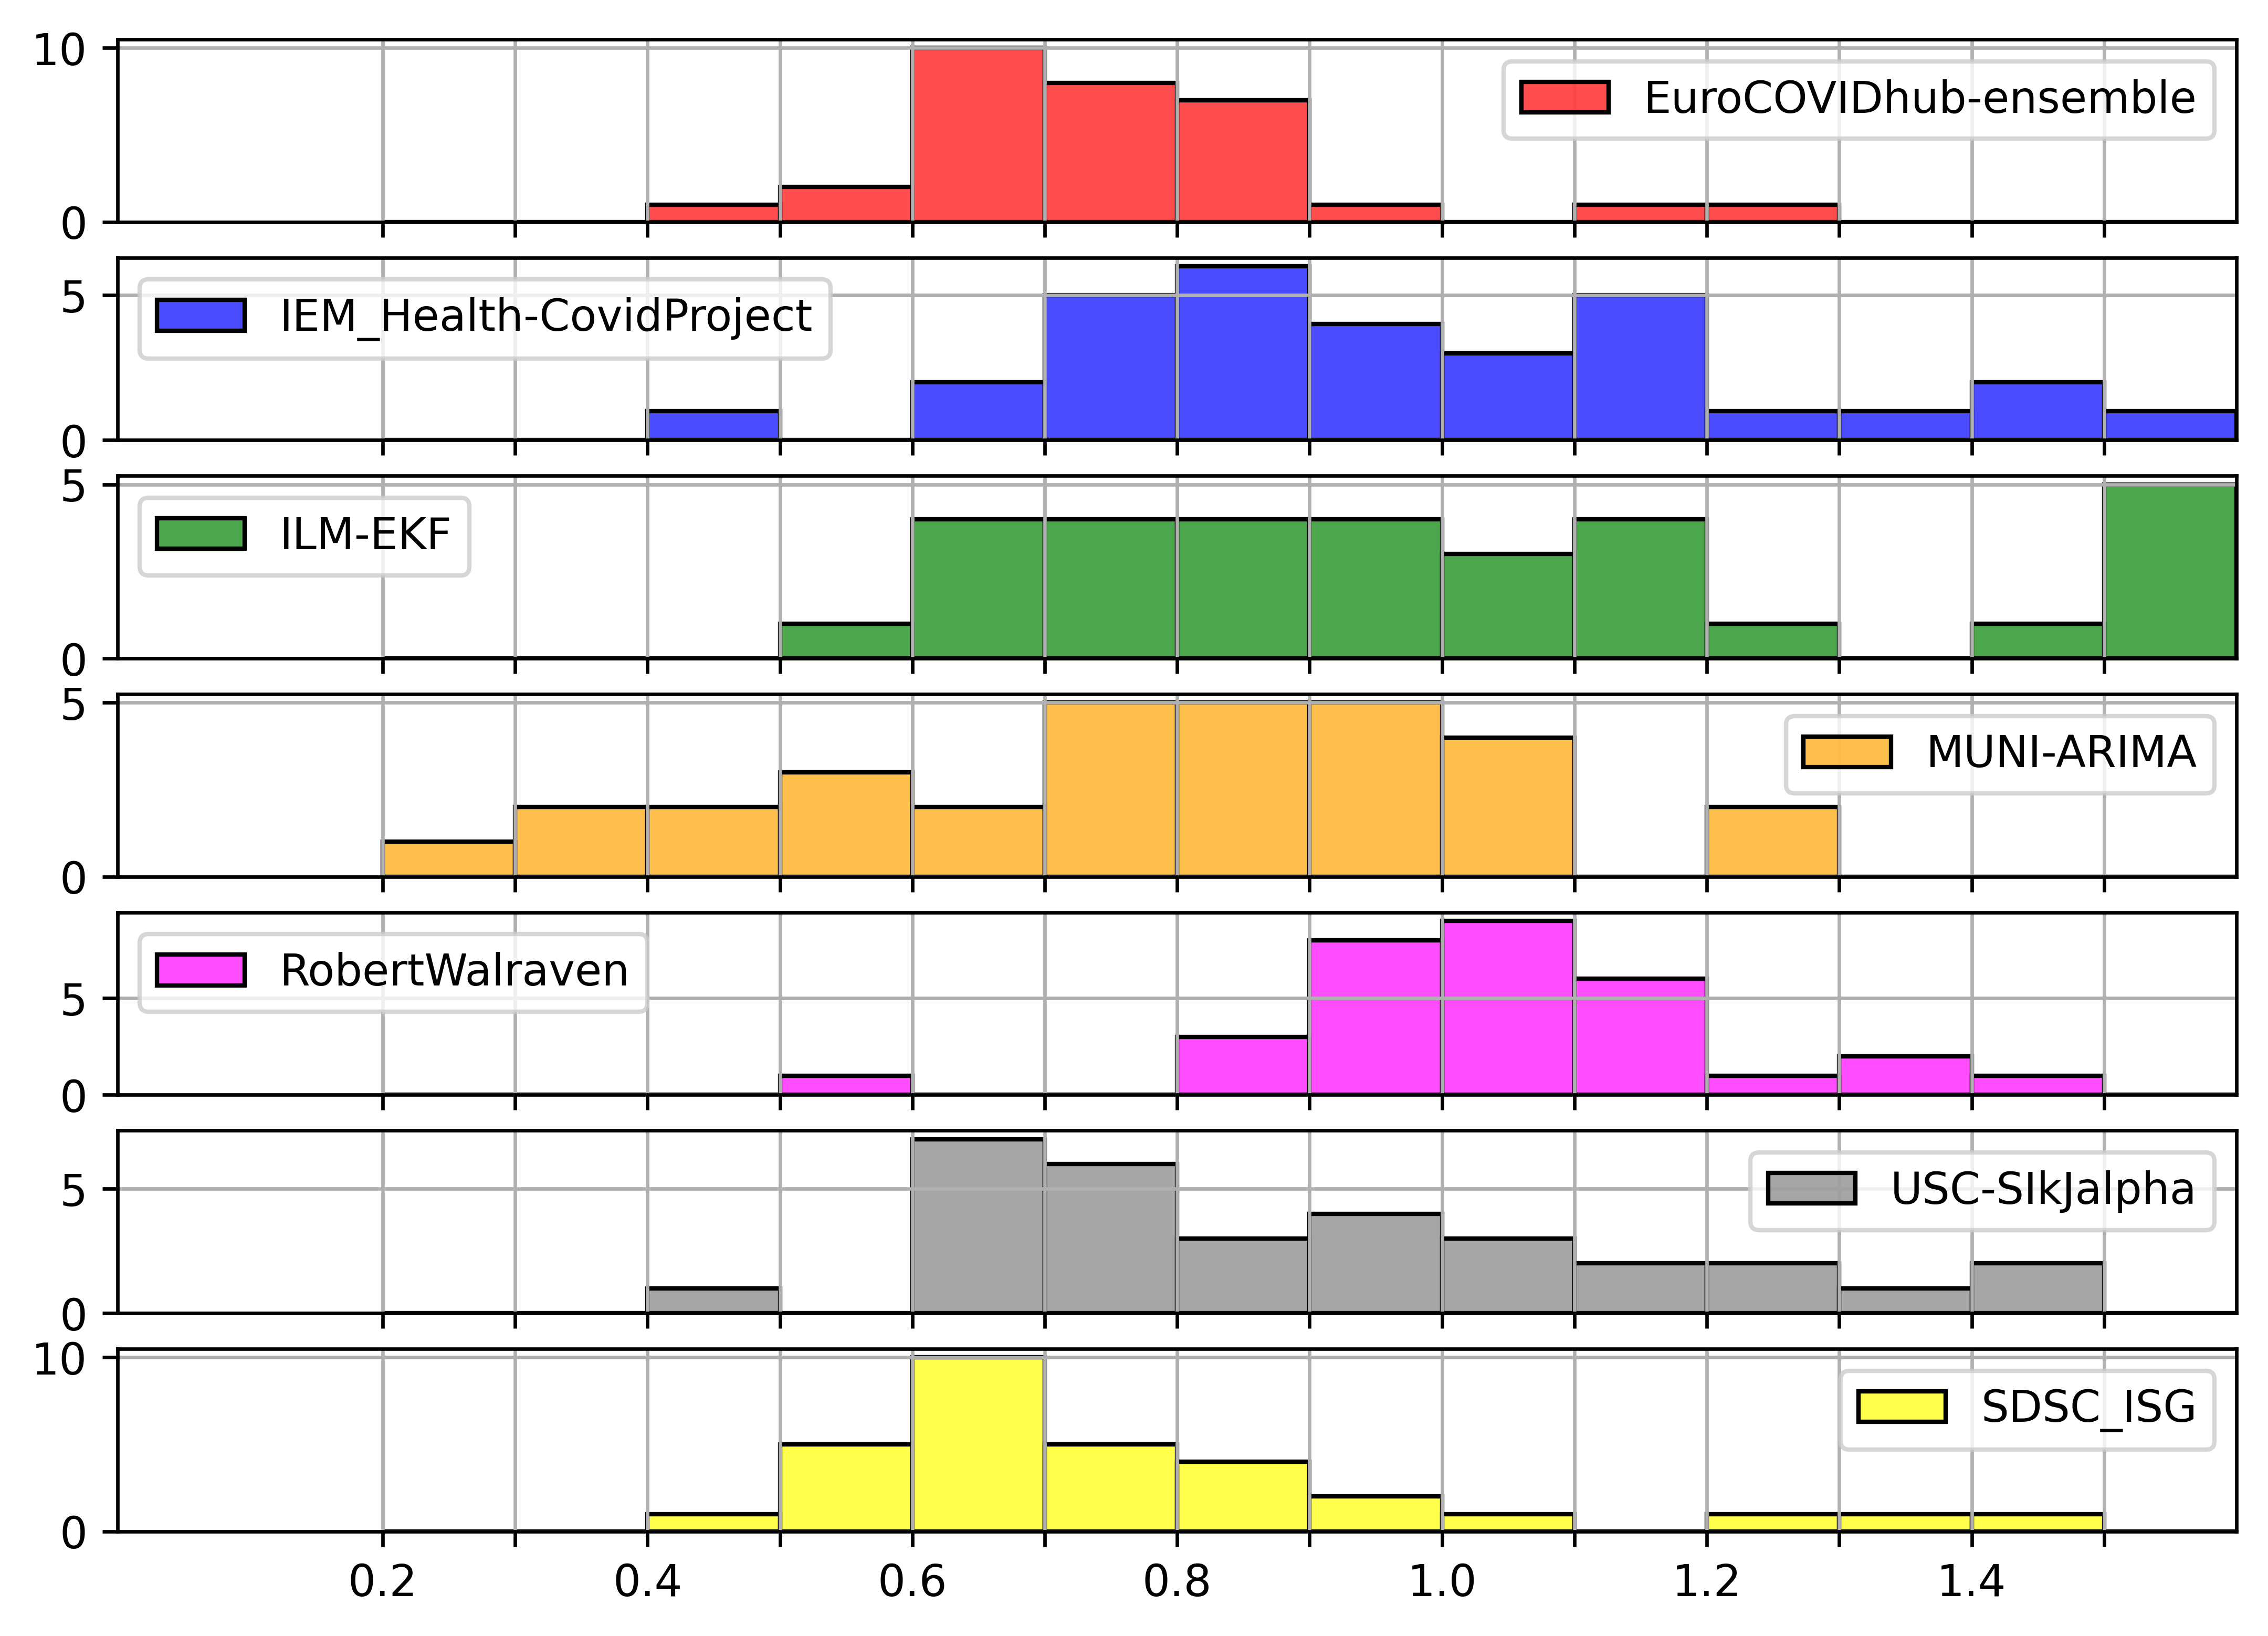

In [21]:
cols = sorted([col for col in RI.columns if "RIMAE" in col])
plot_hist(RI,cols,"mae_1w")
